In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


torch.Size([3, 10, 10])


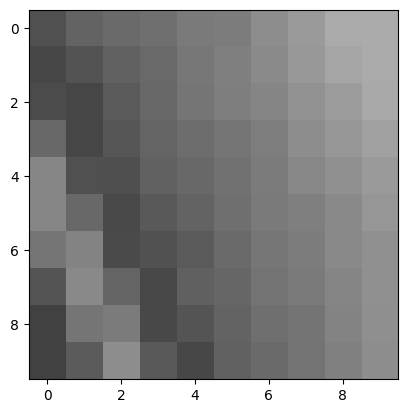

In [23]:
from data import get_img_transforms_train, get_img_transforms_train_target, BigImagesDataset,  get_img_transforms_test, get_img_transforms_test_target
import config.config as config
import matplotlib.pyplot as plt
from utils import convert_rgb_tensor_for_plot


train_transforms = get_img_transforms_train(10)
train_target_transforms = get_img_transforms_train_target(10)
ds_train = BigImagesDataset(str(config.TRAINING_IMGS_DIR), train_transforms, train_target_transforms)

in_img, target = ds_train[100]
plt.imshow(convert_rgb_tensor_for_plot(in_img))
print(ds_train[0][0].shape)

Image([[[0.8041, 0.7290, 0.7025, 0.6805, 0.6407, 0.6319, 0.5656, 0.5126, 0.4508,
         0.4464],
        [0.8395, 0.7909, 0.7379, 0.7070, 0.6495, 0.6186, 0.5745, 0.5215, 0.4685,
         0.4508],
        [0.8218, 0.8439, 0.7644, 0.7114, 0.6584, 0.6230, 0.5965, 0.5480, 0.5082,
         0.4552],
        [0.7114, 0.8439, 0.7820, 0.7246, 0.6893, 0.6584, 0.6275, 0.5656, 0.5259,
         0.4861],
        [0.5921, 0.8041, 0.8085, 0.7379, 0.7114, 0.6760, 0.6363, 0.5877, 0.5524,
         0.5126],
        [0.5921, 0.7114, 0.8306, 0.7688, 0.7290, 0.6805, 0.6407, 0.6186, 0.5789,
         0.5303],
        [0.6584, 0.6054, 0.8262, 0.7997, 0.7644, 0.7025, 0.6540, 0.6319, 0.5789,
         0.5524],
        [0.7865, 0.5789, 0.7246, 0.8350, 0.7423, 0.7158, 0.6672, 0.6407, 0.5965,
         0.5524],
        [0.8615, 0.6584, 0.6363, 0.8350, 0.7865, 0.7290, 0.6805, 0.6628, 0.6054,
         0.5568],
        [0.8615, 0.7600, 0.5656, 0.7688, 0.8395, 0.7379, 0.7025, 0.6672, 0.6142,
         0.5656]]], )


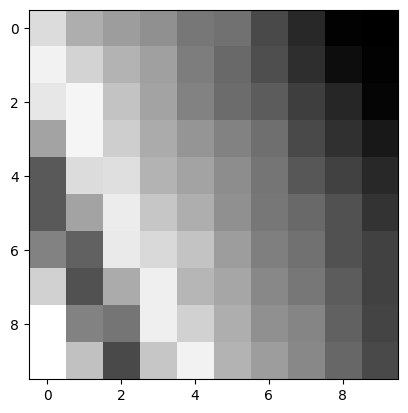

In [24]:
plt.imshow(target[0].detach().numpy(), cmap="gray")
print(target)


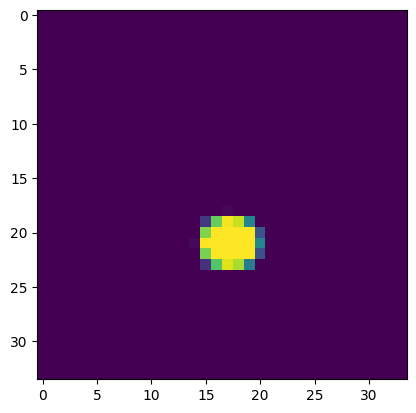

Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached


In [ ]:
from utils import load_transp_conv_weights
import config.config as config
import matplotlib.pyplot as plt
# print(load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])[0][0])
convs = load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])
plt.imshow(convs[0][0].numpy())


In [4]:
from models import NeuralNetwork
import config.config as config
import matplotlib.pyplot as plt

net = NeuralNetwork(str(config.FONT_PATH), 20, 6, 1, config.TYPEWRITER_CONFIG["letterList"])



/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 1, 20, 20])
torch.Size([1, 100, 1, 1])
tensor([[[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

        [[0.8966]],

        [[0.0000]],

        [[0.0000]],

        [[0.0000]],

 

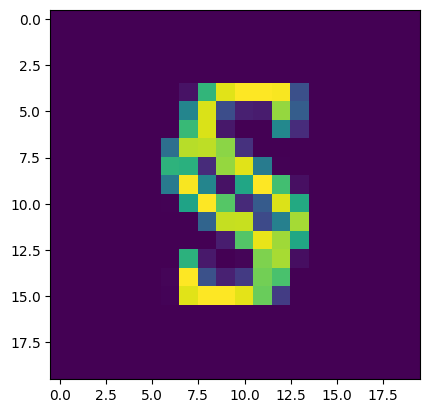

Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached


In [5]:
import torch

test_input = torch.randn(1, 3, 10, 10)
output, type_hits = net(test_input)
plt.imshow(output.detach().numpy()[0][0])
print(output.shape)
print(type_hits.shape)
print(type_hits[0][:])

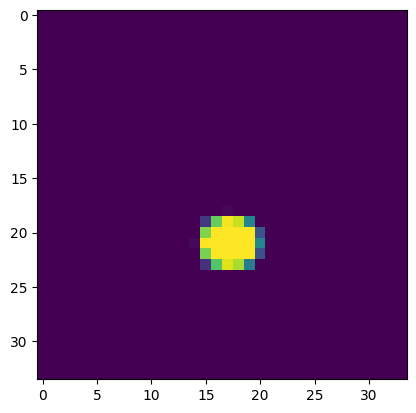

In [13]:
input_tensor = torch.zeros(1, 100, 1, 1)
input_tensor[0][0][0][0] = 0.5
output_transp = net.transp_conv(input_tensor)
plt.imshow(output_transp.detach().numpy()[0][0])